In [ ]:
!wget https://github.com/dhrim/MDC_2021/raw/master/material/deep_learning/data/cat_and_dog.zip
# 링크 주소를 Github의 다운로드 링크 주소를 복사해야한다.

--2021-12-27 01:19:17--  https://github.com/dhrim/MDC_2021/raw/master/material/deep_learning/data/cat_and_dog.zip
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dhrim/MDC_2021/master/material/deep_learning/data/cat_and_dog.zip [following]
--2021-12-27 01:19:17--  https://raw.githubusercontent.com/dhrim/MDC_2021/master/material/deep_learning/data/cat_and_dog.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18902400 (18M) [application/zip]
Saving to: ‘cat_and_dog.zip’

cat_and_dog.zip     100%[===================>]  18.03M  --.-KB/s    in 0.1s    

2021-12-27 01:19:17 (121 MB/s) - ‘cat_and

In [ ]:
!unzip cat_and_dog.zip

Archive:  cat_and_dog.zip
   creating: cat_and_dog/
   creating: cat_and_dog/test/
   creating: cat_and_dog/test/Cat/
  inflating: cat_and_dog/test/Cat/189.jpg  
  inflating: cat_and_dog/test/Cat/200.jpg  
  inflating: cat_and_dog/test/Cat/229.jpg  
  inflating: cat_and_dog/test/Cat/89.jpg  
  inflating: cat_and_dog/test/Cat/60.jpg  
  inflating: cat_and_dog/test/Cat/149.jpg  
  inflating: cat_and_dog/test/Cat/160.jpg  
  inflating: cat_and_dog/test/Cat/49.jpg  
  inflating: cat_and_dog/test/Cat/59.jpg  
  inflating: cat_and_dog/test/Cat/170.jpg  
  inflating: cat_and_dog/test/Cat/159.jpg  
  inflating: cat_and_dog/test/Cat/70.jpg  
  inflating: cat_and_dog/test/Cat/99.jpg  
  inflating: cat_and_dog/test/Cat/239.jpg  
  inflating: cat_and_dog/test/Cat/210.jpg  
  inflating: cat_and_dog/test/Cat/199.jpg  
  inflating: cat_and_dog/test/Cat/9.jpg  
  inflating: cat_and_dog/test/Cat/129.jpg  
  inflating: cat_and_dog/test/Cat/289.jpg  
  inflating: cat_and_dog/test/Cat/100.jpg  
  inflatin

In [ ]:
!apt-get install tree

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 40.7 kB of archives.
After this operation, 105 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tree amd64 1.7.0-5 [40.7 kB]
Fetched 40.7 kB in 0s (98.0 kB/s)
Selecting previously unselected package tree.
(Reading database ... 155222 files and directories currently installed.)
Preparing to unpack .../tree_1.7.0-5_amd64.deb ...
Unpacking tree (1.7.0-5) ...
Setting up tree (1.7.0-5) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [ ]:
!ls -al
# cat_and_dog 압축해제 확인

total 18480
drwxr-xr-x 1 root root     4096 Dec 27 01:20 .
drwxr-xr-x 1 root root     4096 Dec 27 00:48 ..
drwx------ 4 root root     4096 Sep 24 15:46 cat_and_dog
-rw-r--r-- 1 root root 18902400 Dec 27 01:19 cat_and_dog.zip
drwxr-xr-x 4 root root     4096 Dec  3 14:33 .config
drwxr-xr-x 1 root root     4096 Dec  3 14:33 sample_data


In [ ]:
!tree -d cat_and_dog
# 디렉토리 구조 확인
# train, test가 나눠져 있음

cat_and_dog
├── test
│   ├── Cat
│   └── Dog
└── train
    ├── Cat
    └── Dog

6 directories


In [ ]:
!ls -al cat_and_dog/train/Cat/*.jpg | wc
!ls -al cat_and_dog/train/Dog/*.jpg | wc
!ls -al cat_and_dog/test/Cat/*.jpg | wc
!ls -al cat_and_dog/test/Dog/*.jpg | wc
# .jpg갯수 train : test = 240 : 61

    240    2160   17432
    240    2160   17432
     61     549    4370
     61     549    4370


In [ ]:
# 전이학습 Template 가져와서 사용하기

In [ ]:

from IPython.display import clear_output
from tensorflow.keras.callbacks import Callback

class PlotLosses(Callback):

  def on_train_begin(self, logs={}):
    self.epochs = []
    self.losses = []
    self.val_losses = []
    self.logs = []
    self.fig = plt.figure()


  def on_epoch_end(self, epoch, logs={}):

    self.epochs.append(epoch)
    self.losses.append(logs.get('loss'))
    self.val_losses.append(logs.get('val_loss'))

    clear_output(wait=True)
    plt.plot(self.epochs, self.losses, label="loss")
    plt.plot(self.epochs, self.val_losses, label="val_loss")
    plt.legend()
    plt.show();
    print("loss = ", self.losses[-1], ", val_loss = ", self.val_losses[-1])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
model_check_point = ModelCheckpoint(
    'my_model.h5', 
    monitor='val_loss', 
    verbose=0, 
    save_best_only=True)

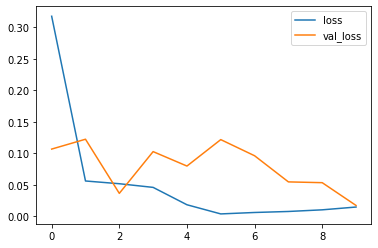

loss =  0.014786767773330212 , val_loss =  0.01729619689285755


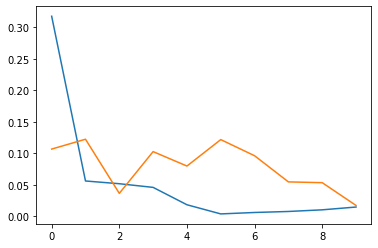

2/2 [==============================] - 1s 286ms/step - loss: 0.0173 - acc: 0.9918
loss= 0.0172961987555027
acc= 0.9918032884597778


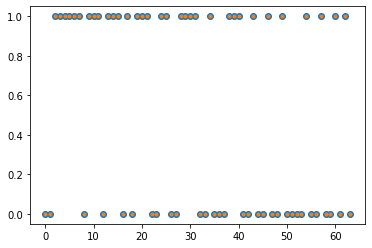

label category index = 0.0
predicted category index = 0
predicted category name = Cat


In [ ]:
import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from tensorflow.keras.applications import efficientnet
from tensorflow.keras.applications import EfficientNetB2

preprocessor = efficientnet.preprocess_input

conv_layers = EfficientNetB2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_layers.trainable = False

model = models.Sequential()

model.add(conv_layers)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(2, activation='softmax'))  #<---- 종속 Cat,Dog 2개

model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])
model.summary()

BATCH_SIZE = 64

train_data_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
      preprocessing_function=preprocessor
).flow_from_directory(
      "cat_and_dog/train",  #<--------파일명 change
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

test_data_generator = ImageDataGenerator(
      preprocessing_function=preprocessor
).flow_from_directory(
      "cat_and_dog/test",     #<-----파일명 change
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

plot_losses = PlotLosses()   #<---- 실시간 그래프 함수
history = model.fit(
      train_data_generator,
      validation_data=test_data_generator,
      verbose = 0,
      epochs=10,
      callbacks = [plot_losses, model_check_point]   #<--- 함수 insert
)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()


loss, acc = model.evaluate(test_data_generator)
print("loss=", loss)
print("acc=", acc)



test_x, test_y = test_data_generator.next()
y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=-1)

plt.plot(test_y[:100], "o")
plt.plot(predicted[:100], '.')
plt.show()


custom_labels = list(test_data_generator.class_indices.keys())
print("label category index =", test_y[0])
print("predicted category index =", predicted[0])
print("predicted category name =", custom_labels[predicted[0]])


In [ ]:
# 정확도가 0.98...?

# model 저장 및 예측

In [ ]:
model.save("my_model.h5")

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [ ]:
from tensorflow import keras
loaded_model = keras.models.load_model("my_model.h5")

In [ ]:
loss, acc = loaded_model.evaluate(test_data_generator)
print("loss = ", loss)
print("acc = ", acc)


2/2 [==============================] - 2s 182ms/step - loss: 0.0363 - acc: 0.9836
loss =  0.036285270005464554
acc =  0.9836065769195557


In [ ]:
y_ = model.predict(test_data_generator)
predicted = np.argmax(y_, axis=-1)
print(predicted)

[0 0 0 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 0
 0 0 1 0 1 1 0 0 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 1
 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0
 1 0 1 1 1 0 0 1 1 0 0]


In [ ]:
batch_x, batch_y = next(test_data_generator)
print(batch_x.shape)
print(batch_y.shape)


(64, 224, 224, 3)
(64,)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


predict=0, truth=0.0


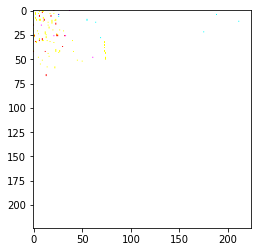

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


predict=0, truth=1.0


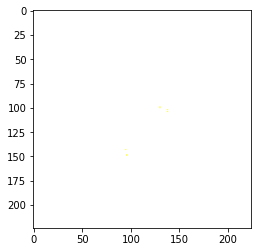

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


predict=0, truth=0.0


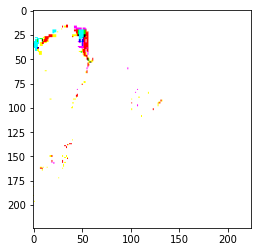

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


predict=0, truth=1.0


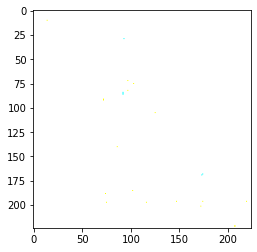

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


predict=0, truth=0.0


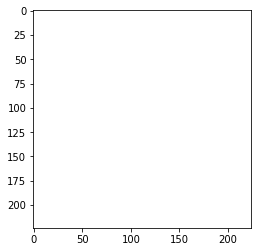

In [ ]:
for i in range(5):
  plt.imshow(batch_x[i])
  print("predict={}, truth={}".format(predicted[i], batch_y[i]))
  plt.show()
  # 음 뭐지??
  # 에러메세지에 0~1 이면 float, 0~255이면 정수로 해야한다고 한다.

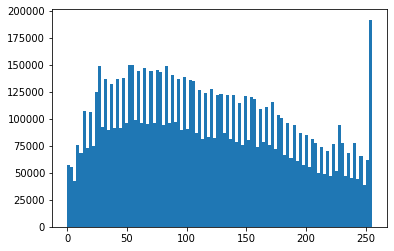

[ 44.  36.  34. ... 114. 106.  95.]


In [ ]:
plt.hist(batch_x.flatten(), bins=100)
plt.show()
print(batch_x[0].flatten())
# 값들이 0~255로 정수여야 하는데 float의 형태를 띄고있다.

# 예측 통합

2/2 [==============================] - 3s 242ms/step - loss: 0.0363 - acc: 0.9836
loss =  0.03628527373075485
acc =  0.9836065769195557
predict=1, truth=1.0


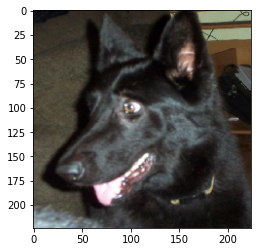

predict=0, truth=1.0


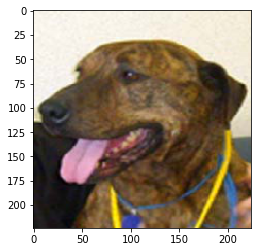

predict=0, truth=1.0


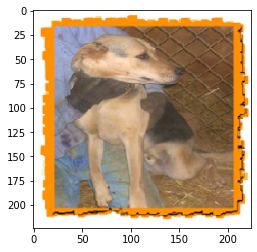

predict=0, truth=0.0


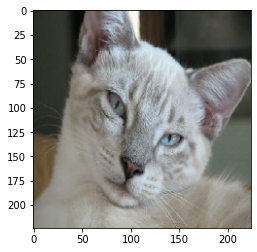

predict=0, truth=1.0


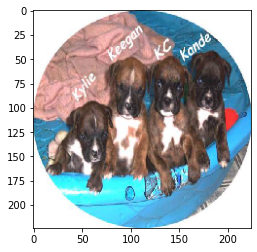

In [ ]:
from tensorflow import keras
loaded_model = keras.models.load_model("my_model.h5")

loss, acc = loaded_model.evaluate(test_data_generator)
print("loss = ", loss)
print("acc = ", acc)

batch_x, batch_y = next(test_data_generator)
# print(batch_x.shape)
# print(batch_y.shape)

y_ = model.predict(test_data_generator)
predicted = np.argmax(y_, axis=-1)
# print(predicted)

for i in range(5):
  plt.imshow(batch_x[i].astype(int))   #<---정수화
  print("predict={}, truth={}".format(predicted[i], batch_y[i]))
  plt.show()

# Weight 로 저장

In [ ]:
model.save_weights("test_model")

INFO:tensorflow:Assets written to: test_model/assets


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


In [ ]:
loaded_model = keras.models.load_model("test_model_weight")

In [ ]:
# 저장한 모델 사용 예시
model = models.Sequential()

model.add(conv_layers)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(2, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])
model.summary()

model.load_weights("test_model_weight")